<a href="https://colab.research.google.com/github/sharonma1218/stats-306/blob/main/lecture06_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('tidyverse')
install.packages('nycflights13')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
options(repr.plot.width=8, repr.plot.height=5)
library(tidyverse)
library(nycflights13)
load(url('https://datasets.stats306.org/mil.RData'))

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Lecture 6: Exploratory data analysis

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Learn how to perform [exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis) (EDA) using the tidyverse and ggplot.
* Understand the correct type(s) of plots for studying:
    - Discrete vs. continuous data
    - Variation (in a single) discrete or continuous variable
    - *Co*variation among two or more discrete or continuous variables
    
This lecture note corresponds to Chapters 11 and 12 of your book. 
</div>


    




## What is exploratory data analysis

<img src="https://upload.wikimedia.org/wikipedia/en/e/e9/John_Tukey.jpg" style="margin: 0 0 0 20px; float: right" />

> Procedures for analyzing data, techniques for interpreting the results of such procedures, ways of planning the gathering of data to make its analysis easier, more precise or more accurate, and all the machinery and results of (mathematical) statistics which apply to analyzing data.



## What is EDA (book version):

1. Generate questions about your data.
2. Search for answers by visualizing, transforming, and modelling your data.
3. Use what you learn to refine your questions and/or generate new questions.
4. (Return to #1).

Two types of questions are always useful for making discoveries within your data:

- What type of variation occurs within my variables?
- What type of covariation occurs between my variables?

## Variation
- Real-life variables change from measurement to measurement. 
- This is often true even if you measure the same thing twice!
- Each measurements has a small amount of error ("noise").
- The noise is different each time you take a measurement.

## Continuous vs. discrete
The appropriate visualization will depend on whether the data are:
- *Continuous*: they take on an infinite number of ordered values.
- *Discrete*: the take on one of a small number of values.

## 🤔 Quiz

Continuous or discrete?: `mpg$manufacturer`

<ol style="list-style-type: upper-alpha;">
    <li>Continuous</li>
    <li>Discrete</li>
    <li>Could be either</li>
</ol>

## 🤔 Quiz

Continuous or discrete?: `diamonds$price`

<ol style="list-style-type: upper-alpha;">
    <li>Continuous</li>
    <li>Discrete</li>
    <li>Could be either</li>
</ol>

In [5]:
?diamonds
diamonds$price%>%head(10)
# based on the def alone, can be treated as a discrete var, esp since price stops after 2 decimal places.
# for heuristic purposes, can be treated as a continuous variable. 

[1] 326 326 327 334 335 336 336 337 337 338

## 🤔 Quiz

Continuous or discrete?: `mil$age`

<ol style="list-style-type: upper-alpha;">
    <li>Continuous</li>
    <li>Discrete</li>
    <li>Could be either</li>
</ol>

In [8]:
load(url('https://datasets.stats306.org/mil.RData'))

In [9]:
mil$age%>%head(10)

[1] 28                     33                     45                    
 [4] 66                     52                     VOL DON'T KNOW/REFUSED
 [7] 60                     54                     48                    
[10] 48                    
78 Levels: 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 ... VOL DON'T KNOW/REFUSED

In [10]:
flights$carrier%>%unique
# discrete var

[1] "UA" "AA" "B6" "DL" "EV" "MQ" "US" "WN" "VX" "FL" "AS" "9E" "F9" "HA" "YV"
[16] "OO"

## Measuring the speed of light
`morley` is a built-in dataset measuring the speed of light.

In [11]:
print(as_tibble(morley))

# A tibble: 100 × 3
    Expt   Run Speed
   <int> <int> <int>
 1     1     1   850
 2     1     2   740
 3     1     3   900
 4     1     4  1070
 5     1     5   930
 6     1     6   850
 7     1     7   950
 8     1     8   980
 9     1     9   980
10     1    10   880
# … with 90 more rows


Here we're measuring the speed of light, an absolute, unchanging, physical constant:

$$c = 299,792,458 \, m/s.$$

But we get a different value with every experiment. Why?

## Visualizing variation in our data

In order to understand how accurately we measured the speed of light, we first need to assess its *variation*. Since the measurement is continuous, we have several options:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


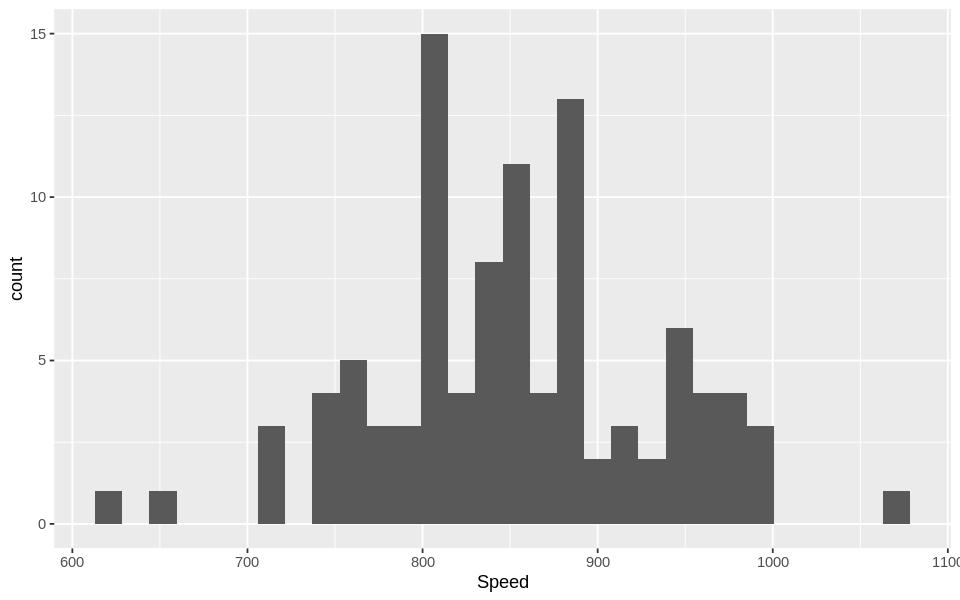

In [16]:
# plot a histogram
ggplot(morley,aes(x=Speed))+
  geom_histogram()

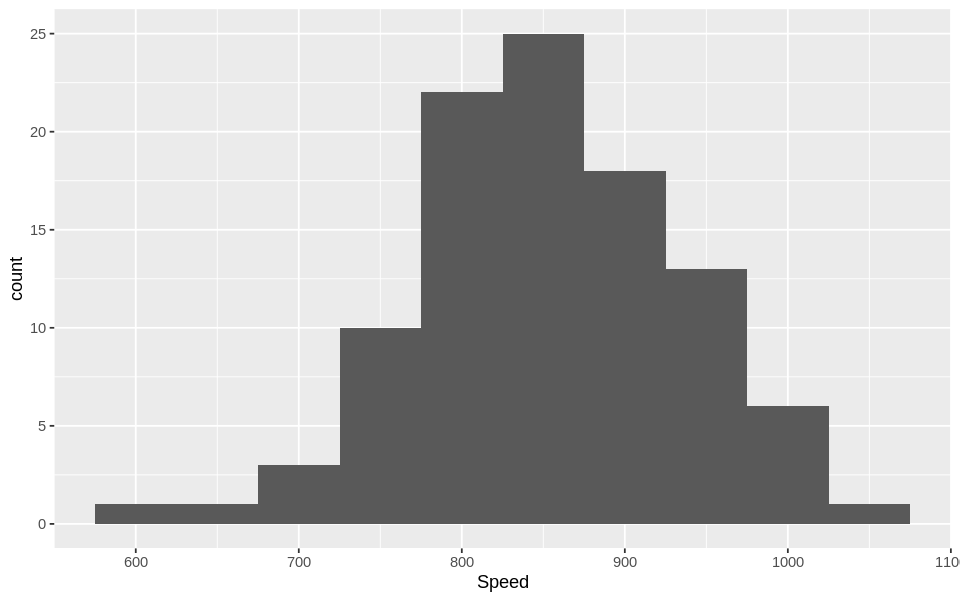

In [15]:
ggplot(morley,aes(x=Speed))+
  geom_histogram(bins=10)

In [19]:
?geom_histogram

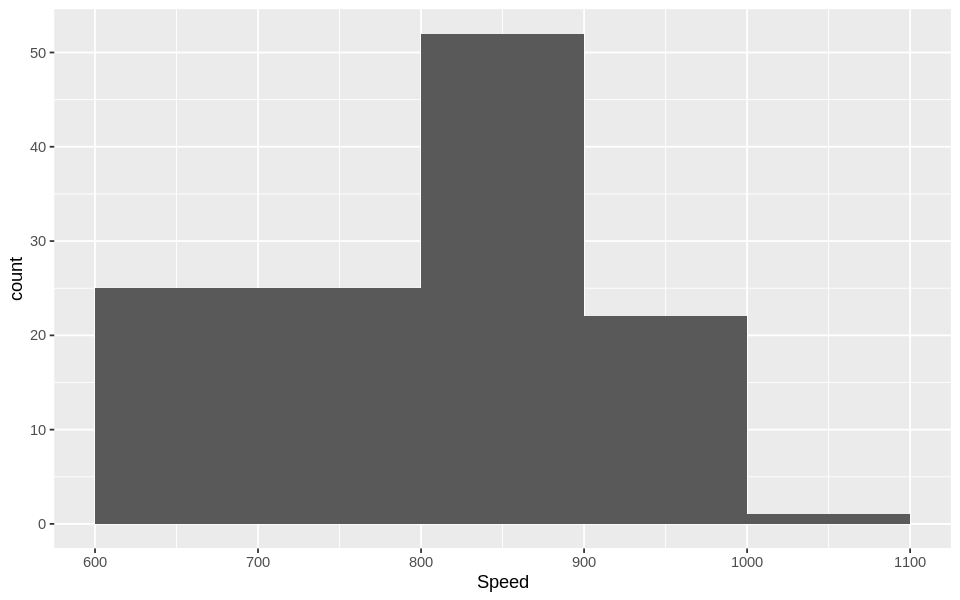

In [23]:
ggplot(morley,aes(x=Speed))+
  geom_histogram(breaks=c(600,800,900,1000,1100))

## What is a histogram?
In office hours I saw some confusion about what a histogram actually represents. So, now we will make one by hand.

In [24]:
# make a histogram by hand.
v=c(1:!0)
cut(v,breaks=c(1,5,10))

[1] <NA>
Levels: (1,5] (5,10]

In [25]:
seq(600,1100,50)

[1]  600  650  700  750  800  850  900  950 1000 1050 1100

In [29]:
df1<-morley%>%
  mutate(bin=cut(Speed,breaks=seq(600,1100,50)))%>% # from 600 to 1100 w/ breaks of 50 
  print 

    Expt Run Speed                bin
001    1   1   850          (800,850]
002    1   2   740          (700,750]
003    1   3   900          (850,900]
004    1   4  1070 (1.05e+03,1.1e+03]
005    1   5   930          (900,950]
006    1   6   850          (800,850]
007    1   7   950          (900,950]
008    1   8   980        (950,1e+03]
009    1   9   980        (950,1e+03]
010    1  10   880          (850,900]
011    1  11  1000        (950,1e+03]
012    1  12   980        (950,1e+03]
013    1  13   930          (900,950]
014    1  14   650          (600,650]
015    1  15   760          (750,800]
016    1  16   810          (800,850]
017    1  17  1000        (950,1e+03]
018    1  18  1000        (950,1e+03]
019    1  19   960        (950,1e+03]
020    1  20   960        (950,1e+03]
021    2   1   960        (950,1e+03]
022    2   2   940          (900,950]
023    2   3   960        (950,1e+03]
024    2   4   940          (900,950]
025    2   5   880          (850,900]
026    2   6

In [27]:
morley$Speed%>%unique

[1]  850  740  900 1070  930  950  980  880 1000  650  760  810  960  940  800
[16]  840  830  790  860  720  620  970  910  870  890  820  770  750  920  780

In [30]:
df1$bin%>%unique

[1] (800,850]          (700,750]          (850,900]          (1.05e+03,1.1e+03]
[5] (900,950]          (950,1e+03]        (600,650]          (750,800]         
10 Levels: (600,650] (650,700] (700,750] (750,800] (800,850] ... (1.05e+03,1.1e+03]

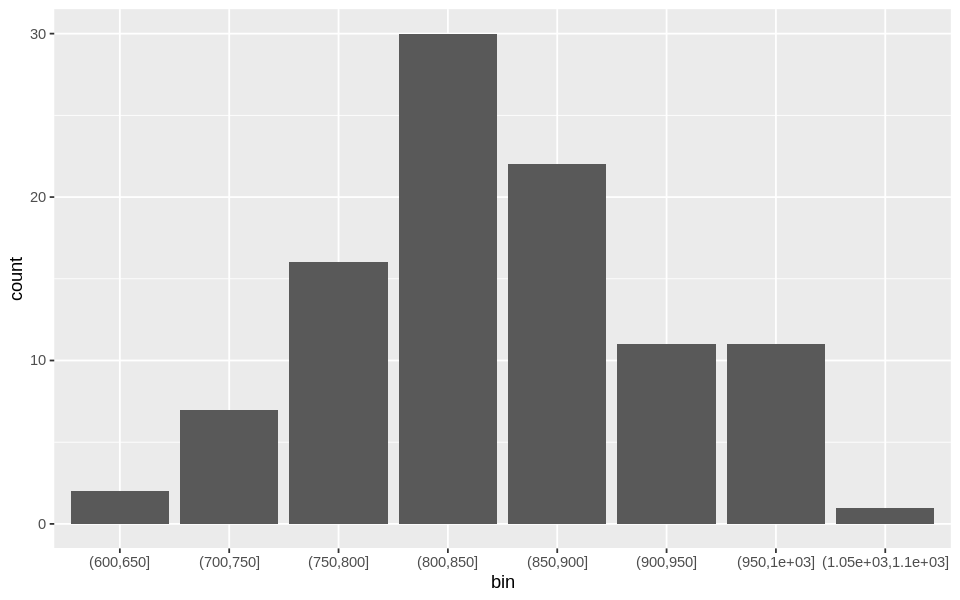

In [32]:
ggplot(df1,aes(x=bin))+
  geom_bar()

## Adjusting a histogram
Any dataset can be plotted using multiple different histograms. For example:

In [ ]:
# adjust the bins/binwidth/breaks in a histogram

There is no one right answer for "how many different bins" -- different values tell different stories about your variable
- Larger values of bins are more detailed but have higher *variance*
- Smaller values are smoother but have higher *bias*

## Follow-up questions
Now that we can see variation in our data, what sort of follow-up questions should we ask?

- Which values are the most common? Why?

- Which values are rare? Why? Does that match your expectations?

- Can you see any unusual patterns? What might explain them?

## The diamonds dataset
Let's look at a different dataset built into R:

In [33]:
print(diamonds)

# A tibble: 53,940 × 10
   carat cut       color clarity depth table price     x     y     z
   <dbl> <ord>     <ord> <ord>   <dbl> <dbl> <int> <dbl> <dbl> <dbl>
 1  0.23 Ideal     E     SI2      61.5    55   326  3.95  3.98  2.43
 2  0.21 Premium   E     SI1      59.8    61   326  3.89  3.84  2.31
 3  0.23 Good      E     VS1      56.9    65   327  4.05  4.07  2.31
 4  0.29 Premium   I     VS2      62.4    58   334  4.2   4.23  2.63
 5  0.31 Good      J     SI2      63.3    58   335  4.34  4.35  2.75
 6  0.24 Very Good J     VVS2     62.8    57   336  3.94  3.96  2.48
 7  0.24 Very Good I     VVS1     62.3    57   336  3.95  3.98  2.47
 8  0.26 Very Good H     SI1      61.9    55   337  4.07  4.11  2.53
 9  0.22 Fair      E     VS2      65.1    61   337  3.87  3.78  2.49
10  0.23 Very Good H     VS1      59.4    61   338  4     4.05  2.39
# … with 53,930 more rows


This is a dataset of price, quality, and other characteristics for 54k diamonds.

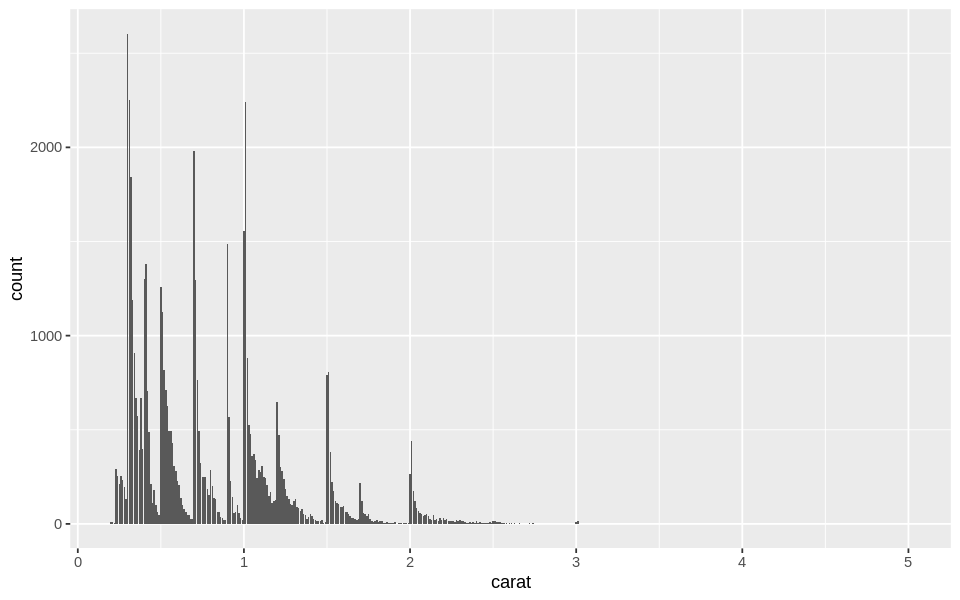

In [47]:
# histogram of carat
diamonds%>%
  ggplot(aes(x=carat))+
  geom_bar()
# x axis goes all the way out to 5, so there must be small counts there. proof that there r outliers.

## 🤔 Quiz

What can be said about the distribution of `carat` in the `diamonds` dataset? (Check all that apply.)

<ol style="list-style-type: upper-alpha;">
    <li>Almost all diamonds are &lt; 3 carats.</li>
    <li>Missing values are encoded as <code>carat = -1</code>.</li>
    <li>Diamond makers appear to prefer diamonds that are rounded to the nearest .1 or .5 or carat.
    <li>There are more diamonds between 0 and 1 carats than &gt;1 carats.</li>
    <li>There are more diamonds that measure 2.0 carats than there are that measure between 1.8 and 2.0 carats.</li>
</ol>

(Hint: plot a histogram, and try out different values for `bins`, `breaks`, or, `binwidth`.)

## Unusual values (outliers)
Outliers are "unusual" observations. 
- Sometimes they are due to data entry errors.
- Sometimes they are important for other reasons. 

In [ ]:
# histogram of diamonds$y

## Visualizing the distribution of a discrete variable
For a discrete variable, generally the only thing we're interested in is the count of each different value that the variable can assume. For this, something like a bar plot is often used:

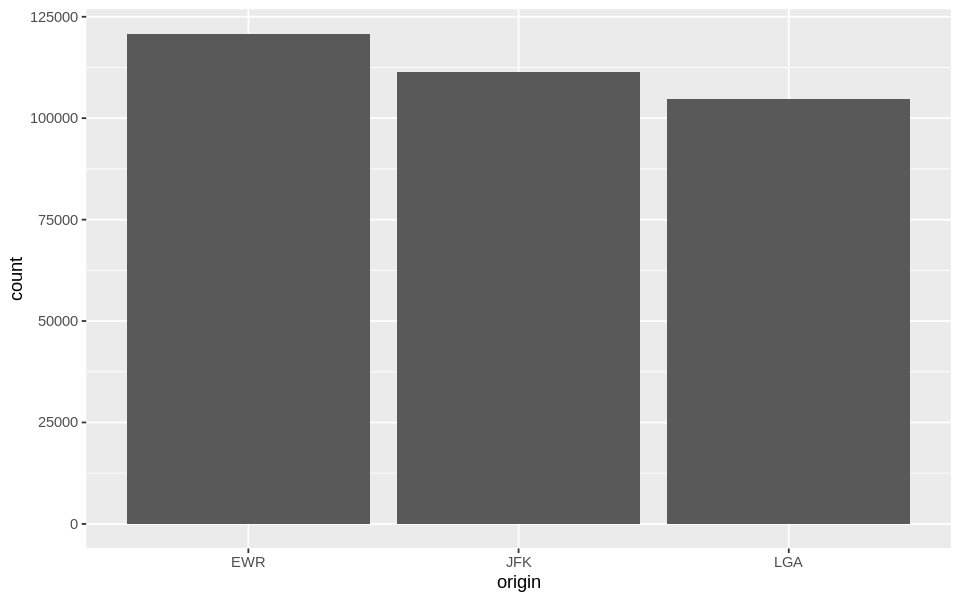

In [54]:
# counts of number of different origin airports (geom_bar)
flights%>%
  ggplot(aes(x=origin))+
  geom_bar()

## Discrete variables with many values
Sometimes a discrete variable can take on a lot of values, such that it's not practical to plot its entire distribution. For example:

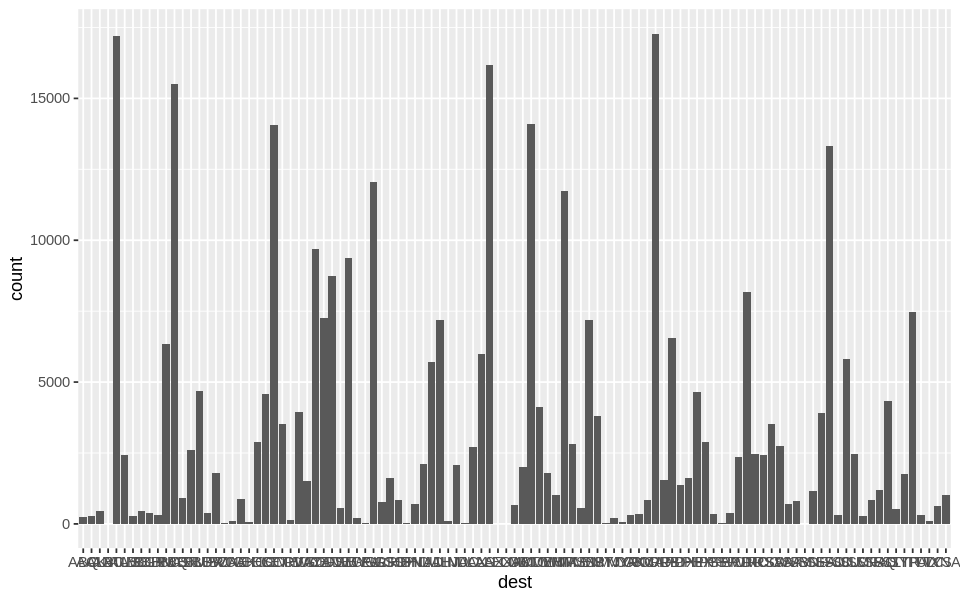

In [57]:
ggplot(flights) + geom_bar(aes(x = dest))

In this case we can reduce the data in some way, for example, only plotting the most common airports:

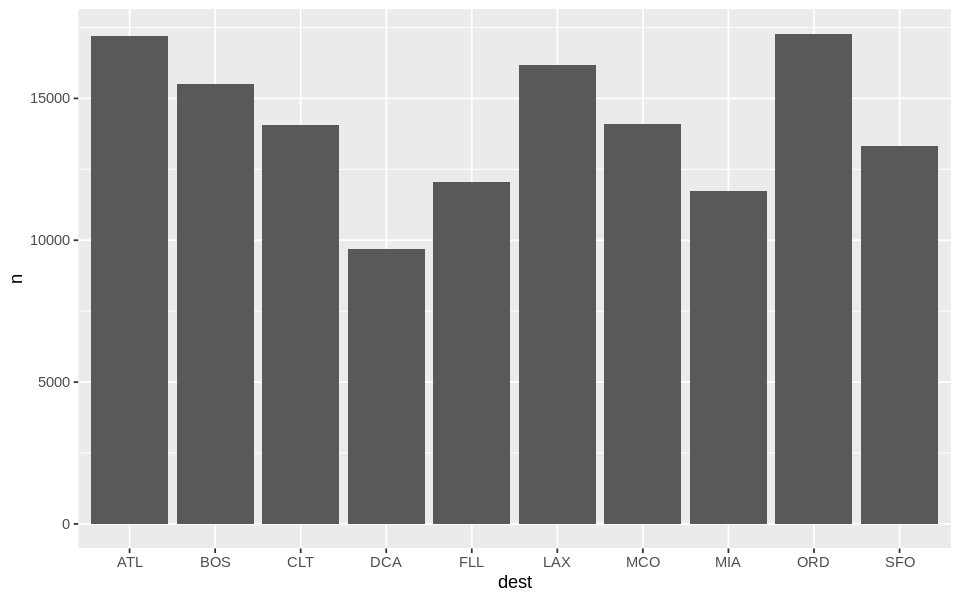

In [62]:
# lump flight destinations into top 10 + other
flights%>%
  count(dest)%>%
  arrange(-n)%>%
  head(10)%>%
  ggplot(aes(x=dest,y=n))+
  geom_bar(stat='identity') # top 10 destinations

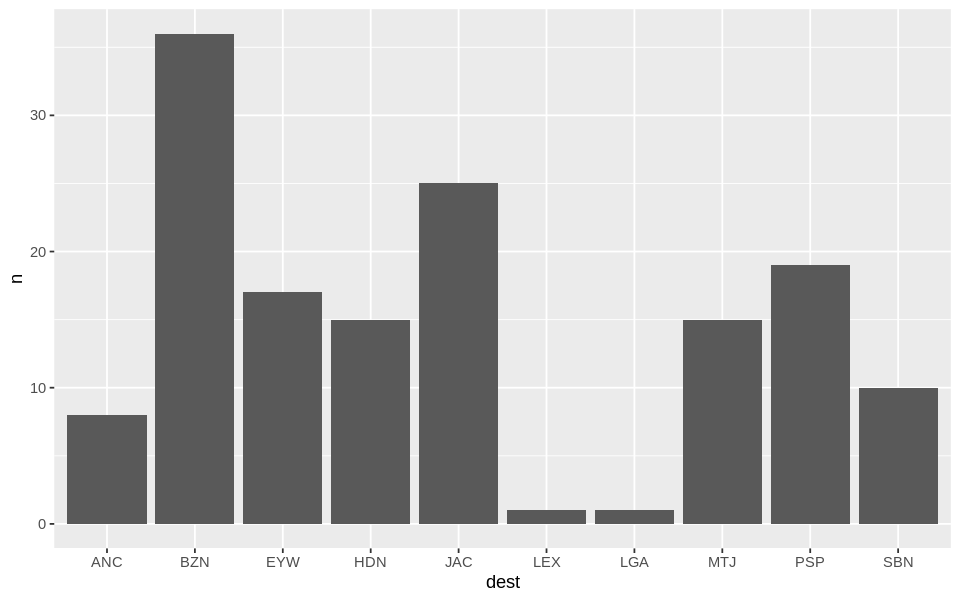

In [63]:
flights%>%
  count(dest)%>%
  arrange(n)%>%
  head(10)%>%
  ggplot(aes(x=dest,y=n))+
  geom_bar(stat='identity') # bottom 10 destinations

(We'll learn more strategies like this when we study categorical data after the midterm.)

## Covariation
**Covariation** is when multiple variables vary together in a similar way. Covariation is everwhere, e.g.:
- Height and weight
- Political preference and religion
- Income this year vs. income last year
- Etc.

One of the best way to spot covariation is to visualize the "joint distribution" of both variables.

When studying covariation among two variables, there are three possibilities, depending on whether the variables are continuous, discrete, or a mixture.

## Continuous and discrete 
With one continuous and one discrete variable, there are several choices:
- Box-and-whisker plot
- Multiple/colored histograms

Let's return to the `morley` dataset and consider covariation between `Expt` (experiment) and `Speed`:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


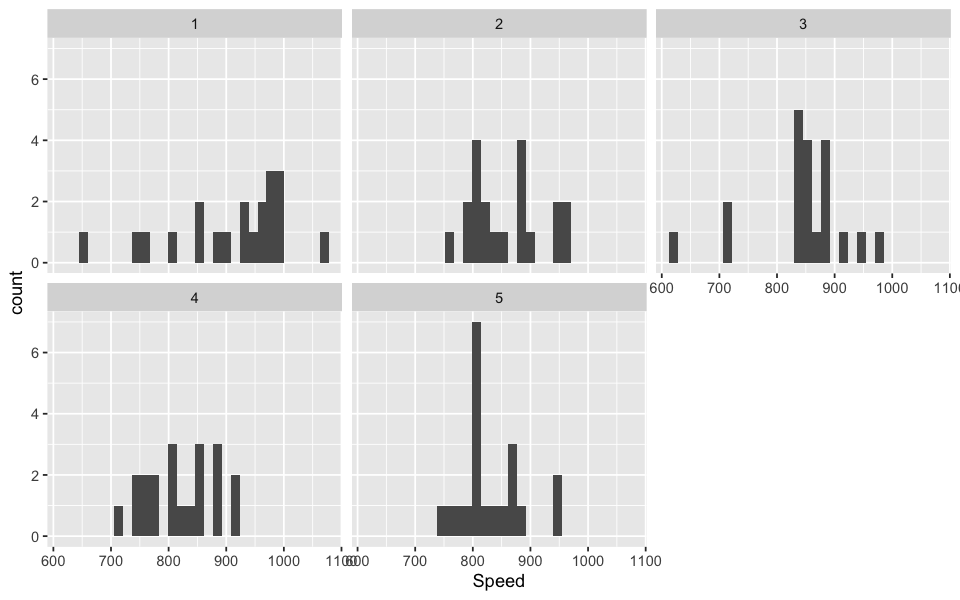

In [ ]:
ggplot(morley) + geom_histogram(aes(x = Speed)) + facet_wrap(~ Expt)

Let's study covariation of `cut` and `price` in the `diamonds` data set.

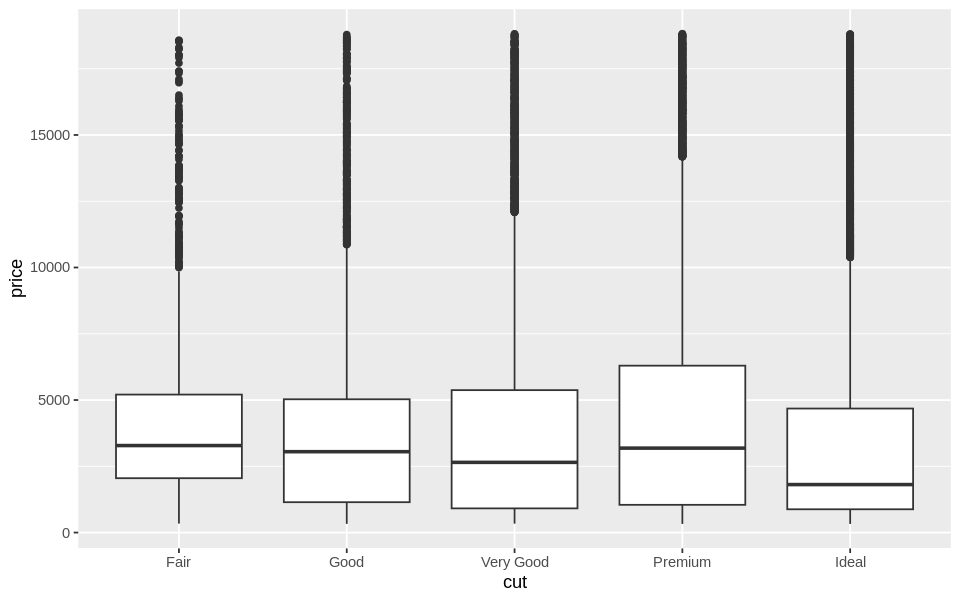

In [64]:
# boxplot cut vs price
diamonds%>%
  ggplot(aes(x=cut,y=price))+
  geom_boxplot()

## Two discrete variables
To study covariation between two discrete variables, we can count the number of observations for each combination of values:

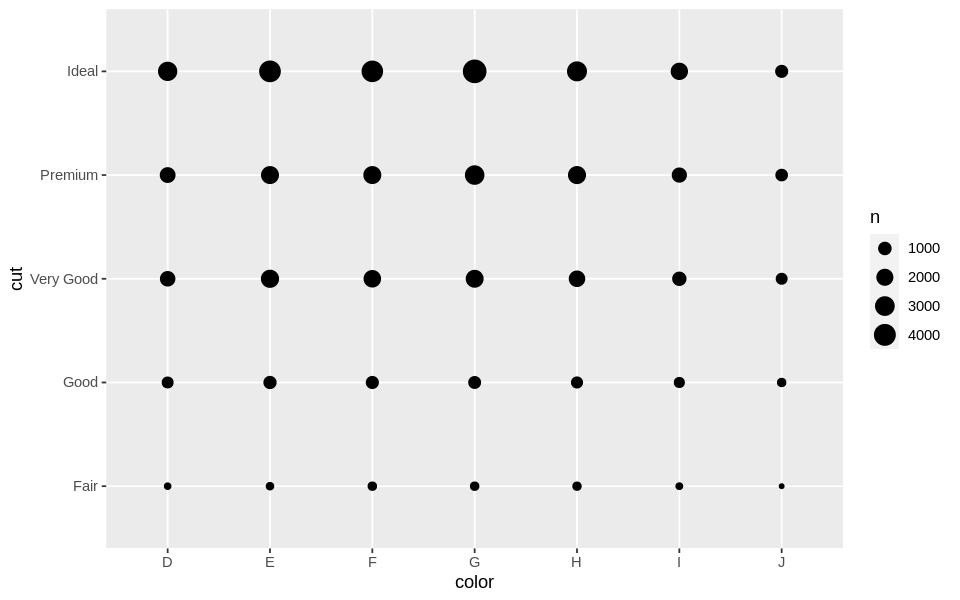

In [65]:
# geom_count to count the number of values for color and cut
diamonds%>%
  ggplot(aes(x=color,y=cut))+
  geom_count()

Another type of plot you will see often (especially in bio) is a heat map:

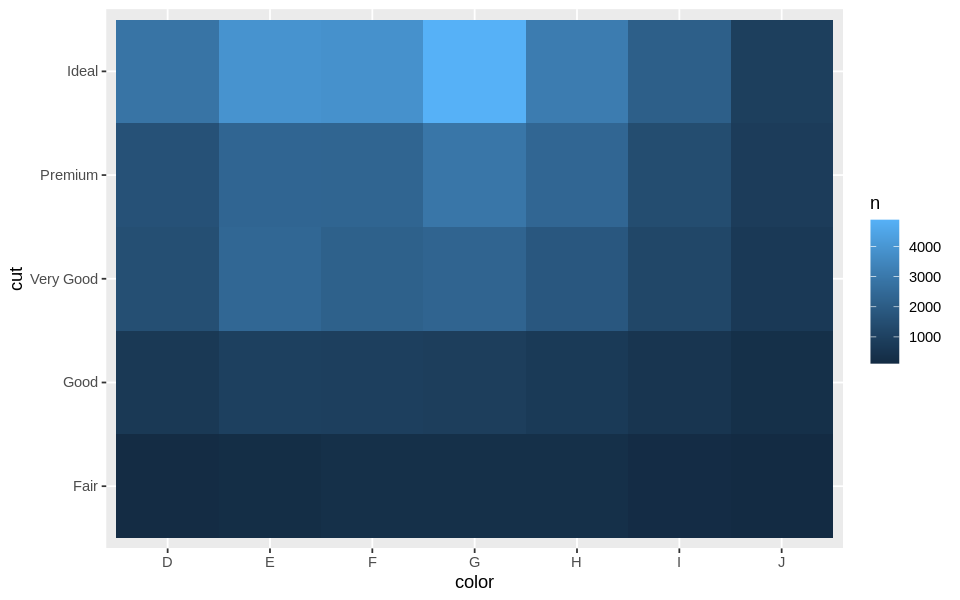

In [67]:
# geom_tile to count the number of values for color and cut
diamonds%>%
  count(color,cut)%>%
  ggplot(aes(x=color,y=cut,fill=n))+
  geom_tile()

## Two continuous variables
Finally, if we're studying the covariation between two continuous variables, we have several options:
- Scatter plot (`geom_point`)
- Binning (`geom_bin2d`/`geom_hex`)
- Contour/bivariate density (`geom_density_2d`)

In [ ]:
# different geoms for carat vs. price

## Three or more variables
Sometimes we even want to study the covariance among of three or more variables. Visualizing >2 dimensional data is, in general, challenging. The best solution tends to depend on the problem at hand.

## Speed of light
Let's consider covariation between all three variables in `morley`:

In [ ]:
# covariation between Speed, Run, and Expt

## Millenials
Let's use these techniques to explore a data set released by the [Pew Research Center](https://www.pewsocialtrends.org/2010/02/24/millennials-confident-connected-open-to-change/) on ... millennials!

![millennials](https://images2.minutemediacdn.com/image/upload/c_crop,h_1189,w_2119,x_0,y_225/f_auto,q_auto,w_1100/v1561494201/shape/mentalfloss/586493-istock-862201574.jpg)

In [ ]:
load(url('https://datasets.stats306.org/mil.RData'))
mil

age,state,q1,q8a,q8b,q8c,q8d,q8e,q8f,q8g,⋯,q44g,q44i,q45a,q46,employ,lwp,finan,home2,educ,health
<fct>,<chr>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
28,NY,Very happy,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Not important,Very important but not the most,⋯,NA,NA,No,NA,Full-time,NA,No,Rent,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
33,NE,Very happy,Not important,One of the most important things,One of the most important things,Very important but not the most,Very important but not the most,Not important,One of the most important things,⋯,NA,NA,Yes,1,Part-time,NA,No,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
45,IN,Pretty happy,Somewhat important,One of the most important things,Somewhat important,One of the most important things,Somewhat important,Not important,Somewhat important,⋯,Yes,No,No,NA,Not employed,Lived with current spouse before married,NA,NA,"College graduate (B.S., B.A., or other 4-year degree)",Covered by health insurance
66,IN,Very happy,Very important but not the most,Very important but not the most,Very important but not the most,Very important but not the most,Somewhat important,Not important,Very important but not the most,⋯,NA,NA,No,NA,Part-time,NA,NA,NA,High school incomplete (Grades 9-11),Covered by health insurance
52,VA,Very happy,One of the most important things,Very important but not the most,Very important but not the most,One of the most important things,Somewhat important,Not important,Very important but not the most,⋯,Yes,Yes,No,NA,Full-time,Lived with both current spouse and someone else,NA,NA,"College graduate (B.S., B.A., or other 4-year degree)",Covered by health insurance
VOL DON'T KNOW/REFUSED,MD,Very happy,Somewhat important,One of the most important things,One of the most important things,Very important but not the most,Somewhat important,Not important,(VOL) Don't know/Refused,⋯,NA,Yes,No,NA,Not employed,NA,NA,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
60,PA,Pretty happy,Not important,One of the most important things,One of the most important things,One of the most important things,One of the most important things,Not important,One of the most important things,⋯,NA,NA,No,NA,Not employed,NA,NA,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance
54,NC,Not too happy,Very important but not the most,Very important but not the most,Very important but not the most,One of the most important things,Very important but not the most,Not important,Very important but not the most,⋯,NA,No,Yes,1,Full-time,NA,NA,NA,High school graduate (Grade 12 or GED certificate),Covered by health insurance
48,FL,Pretty happy,Somewhat important,One of the most important things,One of the most important things,One of the most important things,Very important but not the most,Not important,Very important but not the most,⋯,No,No,No,NA,Not employed,NA,NA,NA,"Some college, no 4-year degree (including associate degree)",Covered by health insurance


Each column of the data corresponds to one of the question asked during the survey. You can find the full script [here](https://docs.google.com/file/d/14U2-rS_ljS7kH97PMFqmNMKDwefSL5AS/edit?usp=docslist_api&filetype=msword).

## 🤔 Quiz

What would be a good way to visualize `mil$age`?

<ol style="list-style-type: upper-alpha;">
    <li>Histogram</li>
    <li>Bar plot</li>
    <li>Scatter plot</li>
    <li>Line plot</li>
    <li>Density plot</li>
</ol>

In [ ]:
# visualize age

## Social networking

    Q.20	How often do you visit the social networking site you use most often… several times a day, about once a day, every few days, once a week or less often?
    
What sort of variable is this (`mil$q20`)? How should we visualize it?

In [ ]:
summary(mil$q20)

Several times a day         About once a day           Every few days 
                     249                      244                      217 
             Once a week               Less often (VOL) Don't know/Refused 
                     140                      176                        1 
                    NA's 
                     993

## Social networking and age
How should I visualize **co**variation in age and social networking use?

In [ ]:
# Age and social joint distribution